In [1]:
## 25 de noviembre
### Librerias
import numpy as np
import scipy.stats as ss
import random 
import math
import matplotlib.pyplot as plt 

In [5]:
np.random.seed(1234)
#Poblacion_1=ss.poisson.rvs()
Poblacion_1=ss.poisson.rvs(loc=5,mu=35,size=15000000)
Poblacion_2=ss.poisson.rvs(loc=18,mu=10,size=10000000)

In [6]:
Poblacion=np.concatenate((Poblacion_1,Poblacion_2))

In [7]:
len(Poblacion)

25000000

In [8]:
Poblacion.mean()

35.20056272

In [9]:
Poblacion_1.mean()

40.00116353333333

In [10]:
Poblacion_2.mean()

27.9996615

In [11]:
## seleccionamos una muestra
muestra_edades=np.random.choice(a=Poblacion,size=50000)

In [12]:
muestra_edades.mean()

35.17866

In [13]:
### Frecuencia Absoluta
Poblacion.mean()-muestra_edades.mean()

0.02190271999999993

In [17]:
### Frecuencia relativa
abs((Poblacion.mean()-muestra_edades.mean())/Poblacion.mean())*100

0.062222641649860334

In [18]:
### Proporción 
poblacion_color_ojos=(["marron"]*137215 + ["azul"]*50025+["verde"]*80132+["negro"]*20200)

In [19]:
len(poblacion_color_ojos)

287572

In [21]:
## Muestra
muestra_color_ojos=random.sample(poblacion_color_ojos,2300)

In [24]:
for color in set(poblacion_color_ojos):
    print("proporcion estimada del {color} será: {resultado}".format(color=color,resultado=muestra_color_ojos.count(color)/len(muestra_color_ojos)))

proporcion estimada del marron será: 0.4743478260869565
proporcion estimada del negro será: 0.07782608695652174
proporcion estimada del azul será: 0.17173913043478262
proporcion estimada del verde será: 0.27608695652173915


In [26]:
import pandas as pd

In [28]:
pd.DataFrame(poblacion_color_ojos)#.values_count()

,0
0,marron
1,marron
2,marron
3,marron
4,marron
...,...
287567,negro
287568,negro
287569,negro
287570,negro


In [29]:
a=pd.DataFrame(poblacion_color_ojos)

In [30]:
a[0].value_counts(normalize=True)

marron    0.477150
verde     0.278650
azul      0.173956
negro     0.070243
Name: 0, dtype: float64

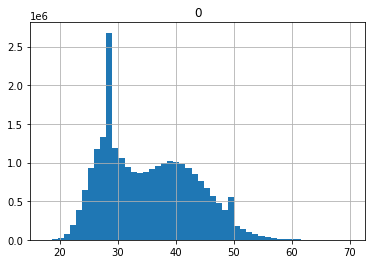

In [33]:
pd.DataFrame(Poblacion).hist(bins=50,range=(17.5,70));

In [34]:
ss.kurtosis(Poblacion)

-0.6947503357645544

In [35]:
ss.skew(Poblacion)

0.343981711746185

In [36]:
np.random.seed(125)
estimacion_puntual=[]
for x in range(200):
    muestra=np.random.choice(a=Poblacion,size=1000)
    estimacion_puntual.append(muestra.mean())

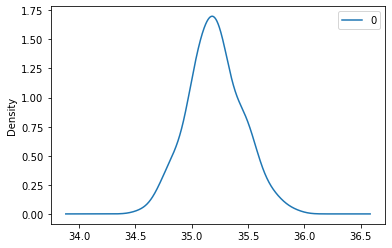

In [39]:
pd.DataFrame(estimacion_puntual).plot(kind="density");

In [41]:
np.array(estimacion_puntual).mean()

35.20601

In [42]:
Poblacion.mean()

35.20056272

In [43]:
### Intervalos de Confianza

In [44]:
n=100
muestra=np.random.choice(a=Poblacion,size=n)
media_muestral=muestra.mean()

In [45]:
## Conociendo la varianza

In [54]:
alpha=0.05

In [55]:
z_alpha_2=alpha/2

$$\bar{x}\pm Z_{\cfrac{\alpha}{2}}\cfrac{\sigma}{\sqrt{n}}$$

In [56]:
z_critico=ss.norm.ppf(z_alpha_2)

In [57]:
z_critico

-1.9599639845400545

In [58]:
desviacion=Poblacion.std()

In [62]:
Error=z_critico*(desviacion/n)

In [63]:
print("Mi intervalo de confianza para la media es de [{0},{1}]".format(media_muestral+Error,media_muestral-Error))

Mi intervalo de confianza para la media es de [35.02872262234928,35.33127737765072]


In [68]:
Intervalo=[]
muestra_medias=[]
for i in range(30):
    muestra=np.random.choice(a=Poblacion,size=n)
    muestra_medias.append(muestra.mean())
    z_critico=ss.norm.ppf(0.975)
    desviacion=Poblacion.std()
    error=z_critico*(desviacion/n)
    Intervalo_confianza=(muestra.mean()-error,muestra.mean()+error)
    Intervalo.append(Intervalo_confianza)


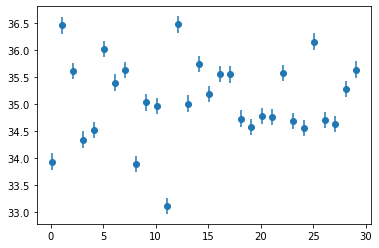

In [72]:
plt.errorbar(x=np.arange(0.1,30,1),
            y=muestra_medias,
            yerr=[(max-min)/2 for max, min in Intervalo],
            fmt='o');

In [73]:
### La varianza población es desconocida

In [74]:
n=23
muestra=np.random.choice(a=Poblacion,size=n)

In [75]:
media_muestral=muestra.mean()
t_critico=ss.t.ppf(0.975,df=n-1)
cuasi_desviacion_muestral=muestra.std(ddof=1)


In [77]:
intervalo_confianza=(media_muestral-t_critico*cuasi_desviacion_muestral/math.sqrt(n),media_muestral+t_critico*cuasi_desviacion_muestral/math.sqrt(n))

In [78]:
intervalo_confianza

(32.505752914080084, 40.972507955485135)

In [79]:
### Ejercicio

### que voy hacer esquema
## Extraer un numero aleatorio
### coger una muestra con ese numero aleatorio del dataframe 
### coger y hacer un intervalo de confianza por cada una de la muestra
#### Mostrar por pantalla


# IMPORTING REQUIRED LIBRARIES & ASSIGNING ALIASES:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Loading built-in Datasets:
iris = sns.load_dataset("iris")



# ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

# ci_lower = acc_test - ci_length
# ci_upper = acc_test + ci_length

# print(ci_lower, ci_upper)

In [80]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [95]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Loading built-in Datasets:
iris = sns.load_dataset("iris")
def intervalos_confianza(dataframe,n1=30,n2=50):
    for i in dataframe.select_dtypes(include="number").columns:
        if n1<150 & n2<150:
            muestra_iris=iris.sample(np.random.randint(n1,n2))
            if len(muestra_iris)<30:
                n=len(muestra_iris)
                print("Utilizaremos la t stdunet")

                media_muestral=muestra_iris[i].mean()
                t_critico=ss.t.ppf(0.975,df=len(muestra_iris)-1)
                cuasi_desviacion_muestral=muestra_iris[i].std(ddof=1)
                intervalo_confianza=(media_muestral-t_critico*cuasi_desviacion_muestral/math.sqrt(n),media_muestral+t_critico*cuasi_desviacion_muestral/math.sqrt(n))
                print("Intervalo de confianza para la columna {i} es de {IC}".format(i=i,IC=intervalo_confianza))
            if len(muestra_iris)<150 & len(muestra_iris)>29:
                n=len(muestra_iris)
                print("Utilizaremos la normal stdunet")
                z_critico=ss.norm.ppf(0.975)
                media_muestral=muestra_iris[i].mean()        
                cuasi_desviacion_muestral=muestra_iris[i].std(ddof=1)
                intervalo_confianza=(media_muestral-z_critico*cuasi_desviacion_muestral/math.sqrt(n),media_muestral+z_critico*cuasi_desviacion_muestral/math.sqrt(n))
                print("Intervalo de confianza para la columna {i} es de {IC}".format(i=i,IC=intervalo_confianza))
        else:
            break#("Error")

In [96]:
intervalos_confianza(iris,200,250)